In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

types = ['B', 'CD4_T', 'CD8_T', 'DC', 'Mono', 'NK', 'other', 'other_T']

In [2]:
import os
os.chdir('/Users/evanli/Documents/EvanPys/Progress/PBMC_Hao/Remove_pvl0_v3_ttsplit/lambda_decision_ignore_section/v3_feature_selection')

features_dict = {}
# Read features for each celltype
for celltype in types:
    try:
        feature_df = pd.read_csv(f'{celltype}_features.txt', names=['Gene', 'Weight', 'Tendency'], sep='\t')
        features_dict[celltype] = feature_df
    except:
        print('skipping:', celltype)
        continue
    print(celltype, 'Feature count:', feature_df.shape[0])
    print(celltype, 'Positive feature count:', feature_df[feature_df['Tendency'] == 1].shape[0])
    print('------------------')

B Feature count: 17
B Positive feature count: 9
------------------
CD4_T Feature count: 1786
CD4_T Positive feature count: 36
------------------
CD8_T Feature count: 26
CD8_T Positive feature count: 9
------------------
DC Feature count: 19
DC Positive feature count: 10
------------------
Mono Feature count: 18
Mono Positive feature count: 11
------------------
NK Feature count: 28
NK Positive feature count: 15
------------------
other Feature count: 5
other Positive feature count: 4
------------------
other_T Feature count: 76
other_T Positive feature count: 28
------------------


In [3]:
count_df = pd.DataFrame(columns=['Feature_count', 'Positive_feature_count'])
for celltype in features_dict.keys():
    feature_df = features_dict[celltype]
    feature_count = feature_df.shape[0]
    positive_count = feature_df[feature_df['Tendency'] == 1].shape[0]
    count_df.loc[celltype] = [feature_count, positive_count]
count_df

,Feature_count,Positive_feature_count
B,17,9
CD4_T,1786,36
CD8_T,26,9
DC,19,10
Mono,18,11
NK,28,15
other,5,4
other_T,76,28


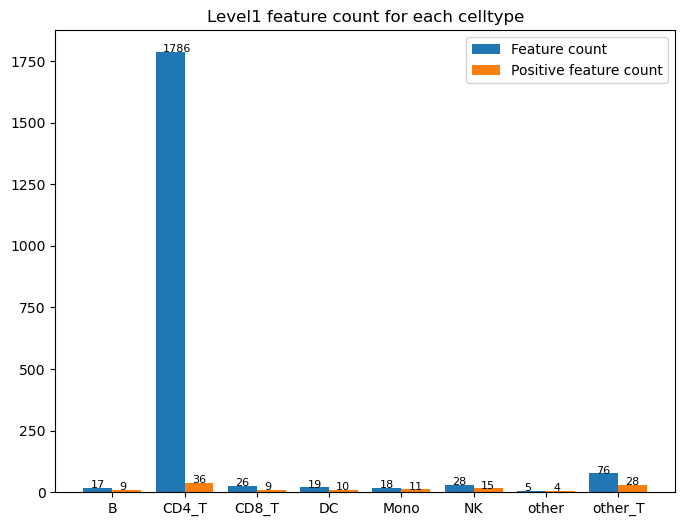

In [12]:
# plot barplot
fig, ax = plt.subplots(figsize=(8, 6))
x = np.arange(len(count_df.index))
bar_width = 0.4

ax.bar(x - bar_width/2, count_df['Feature_count'], bar_width, label='Feature count')
ax.bar(x + bar_width/2, count_df['Positive_feature_count'], bar_width, label='Positive feature count')

# Add the values to each bar
for i, v in enumerate(count_df['Feature_count']):
    plt.text(i-0.3, v, str(v), fontsize=8)
for i, v in enumerate(count_df['Positive_feature_count']):
    plt.text(i+0.1, v, str(v), fontsize=8)

ax.set_xticks(x)
ax.set_xticklabels(count_df.index)
# plt.xticks(rotation=45)
plt.title('Level1 feature count for each celltype')
ax.legend()
plt.show()